In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset 1 – USA Poverty Level Wages

Link: https://www.kaggle.com/datasets/asaniczka/poverty-level-wages-in-the-usa-dataset-1973-2022

In [ ]:
# Reading the data into a dataframe

df1 = pd.read_csv("../Lab 5/poverty_level_wages.csv")
df1

,year,annual_poverty-level_wage,hourly_poverty-level_wage,0-75%_of_poverty_wages,75-100%_of_poverty_wages,share_below_poverty_wages,100-125%_of_poverty_wages,125-200%_of_poverty_wages,200-300%_of_poverty_wages,300%+_of_poverty_wages,...,women_300%+_of_poverty_wages,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
0,2022,27733,13.33,4.7,7.5,12.2,15.2,32.7,19.5,20.4,...,16.7,10.7,8.1,13.5,16.2,14.5,17.7,15.4,12.3,19.2
1,2021,25688,12.35,3.8,9.1,12.9,15.0,30.3,20.4,21.5,...,17.4,11.1,8.7,13.8,18.0,15.7,19.9,16.8,14.2,20.0
2,2020,24544,11.80,3.4,8.6,12.0,13.0,31.5,20.8,22.6,...,18.1,10.4,7.9,13.1,18.1,15.4,20.5,14.9,12.0,18.6
3,2019,24242,11.65,4.4,11.3,15.7,14.2,31.2,18.7,20.3,...,16.0,13.4,10.5,16.6,22.3,19.2,24.9,19.7,15.8,24.6
4,2018,23809,11.45,5.0,13.0,18.1,14.2,29.3,19.1,19.4,...,15.2,15.0,11.6,18.7,26.0,23.1,28.5,24.3,19.3,30.7
5,2017,23244,11.18,5.1,15.3,20.4,12.0,29.8,18.4,19.4,...,15.1,16.8,13.4,20.5,29.1,26.4,31.4,28.5,23.7,34.8
6,2016,22755,10.94,5.6,15.2,20.8,13.2,28.4,18.8,18.9,...,14.9,17.3,14.0,20.8,28.8,25.1,32.0,29.2,24.7,35.1
7,2015,22464,10.80,6.7,16.3,23.0,13.0,27.1,18.7,18.2,...,14.2,18.9,15.2,22.9,31.8,28.3,34.8,33.5,29.1,39.2
8,2014,22422,10.78,8.2,16.2,24.4,12.3,27.7,18.7,16.9,...,13.2,20.2,16.0,24.6,32.4,30.2,34.3,36.2,31.7,42.1
9,2013,22048,10.60,6.4,18.6,25.0,12.2,27.5,18.0,17.3,...,13.2,20.8,16.9,24.9,31.9,29.0,34.4,38.2,34.8,42.7


In [ ]:
# Checking for NaN values

df1.isna().sum()

year                                        0
annual_poverty-level_wage                   0
hourly_poverty-level_wage                   0
0-75%_of_poverty_wages                      0
75-100%_of_poverty_wages                    0
share_below_poverty_wages                   0
100-125%_of_poverty_wages                   0
125-200%_of_poverty_wages                   0
200-300%_of_poverty_wages                   0
300%+_of_poverty_wages                      0
men_0-75%_of_poverty_wages                  0
men_75-100%_of_poverty_wages                0
men_share_below_poverty_wages               0
men_100-125%_of_poverty_wages               0
men_125-200%_of_poverty_wages               0
men_200-300%_of_poverty_wages               0
men_300%+_of_poverty_wages                  0
women_0-75%_of_poverty_wages                0
women_75-100%_of_poverty_wages              0
women_share_below_poverty_wages             0
women_100-125%_of_poverty_wages             0
women_125-200%_of_poverty_wages   

In [ ]:
# Standardising the data

scaler = StandardScaler()
scaled_df1 = pd.DataFrame(scaler.fit_transform(df1))
scaled_df1

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.697749,2.000908,1.999774,-1.163567,-2.711481,-2.748544,1.455659,2.330762,0.081469,1.649480,...,1.642362,-2.417764,-2.569981,-2.028048,-2.724329,-2.533452,-2.412642,-2.849687,-2.494945,-2.935415
1,1.628453,1.666905,1.666852,-1.435570,-2.162459,-2.584913,1.267589,0.711240,1.303501,1.920614,...,1.786320,-2.326424,-2.352554,-1.987412,-2.403064,-2.274231,-2.129165,-2.645701,-2.224745,-2.834689
2,1.559158,1.480059,1.480008,-1.556460,-2.334029,-2.795296,-0.613107,1.521001,1.846627,2.191748,...,1.930279,-2.486269,-2.642456,-2.082231,-2.385216,-2.339037,-2.051854,-2.922540,-2.537608,-3.010960
3,1.489862,1.430734,1.429051,-1.254234,-1.407554,-1.930386,0.515311,1.318561,-1.004782,1.624832,...,1.498403,-1.801220,-1.700275,-1.608135,-1.635597,-1.518170,-1.484901,-2.223158,-1.997208,-2.255513
4,1.420566,1.360013,1.361108,-1.072899,-0.824219,-1.369363,0.515311,0.036439,-0.461657,1.402995,...,1.333879,-1.435861,-1.301660,-1.323677,-0.975218,-0.675702,-1.021030,-1.552918,-1.499470,-1.487475
5,1.351270,1.267734,1.269384,-1.042677,-0.035000,-0.831716,-1.553455,0.373840,-1.412126,1.402995,...,1.313313,-1.024832,-0.649380,-1.079856,-0.421928,0.037155,-0.647357,-0.940959,-0.873743,-0.971253
6,1.281974,1.187867,1.187852,-0.891564,-0.069314,-0.738213,-0.425037,-0.570881,-0.869001,1.279752,...,1.272182,-0.910658,-0.431954,-1.039219,-0.475472,-0.243668,-0.570045,-0.838966,-0.731532,-0.933481
7,1.212678,1.140339,1.140292,-0.559117,0.308138,-0.223942,-0.613107,-1.448122,-1.004782,1.107212,...,1.128224,-0.545298,0.002899,-0.754761,0.059970,0.447588,-0.209257,-0.212437,-0.105805,-0.417259
8,1.143382,1.133479,1.133498,-0.105779,0.273825,0.103322,-1.271351,-1.043242,-1.004782,0.786781,...,0.922569,-0.248444,0.292801,-0.524486,0.167058,0.858021,-0.273684,0.180965,0.263943,-0.052126
9,1.074086,1.072395,1.072349,-0.649784,1.097357,0.243577,-1.365385,-1.178202,-1.955252,0.885376,...,0.922569,-0.111435,0.618941,-0.483849,0.077818,0.598800,-0.260798,0.472374,0.704796,0.023419


In [ ]:
# Implementing KMeans

kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(scaled_df1)

KMeans(init='random', n_clusters=3)

In [ ]:
pred = kmeans.predict(scaled_df1)
pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
kmeans.cluster_centers_

array([[ 1.59380554,  1.64465142,  1.64392142, -1.35245761, -2.15388082,
        -2.51478477,  0.656363  ,  1.47039073,  0.55670358,  1.84666864,
        -1.24758711, -2.18846883, -2.30811065,  0.66805268,  1.05172976,
        -0.75340333,  1.89450401, -1.40112848, -1.67307634, -2.14252153,
         0.1907252 ,  1.94642393,  1.19440515,  1.71434093, -2.25791938,
        -2.31631668, -1.92645634, -2.28705122, -2.16622258, -2.01964038,
        -2.66027165, -2.31362644, -2.75914436],
       [-0.86619866, -0.84807502, -0.84813586,  0.6461574 ,  0.37813871,
         0.75691328, -0.02632975,  0.20918822,  0.16836889, -0.89523499,
         0.53479577, -0.01934558,  0.3880302 , -0.54732026,  0.33150004,
         0.72869   , -0.88766702,  0.73268147,  0.53161345,  0.86381442,
         0.47385809, -0.04576108, -0.80529861, -0.89130921,  0.84671977,
         0.58995049,  0.89184282,  0.82315282,  0.60744095,  0.86228362,
         0.54056347,  0.394777  ,  0.69173766],
       [ 0.72760688,  0.6963

In [ ]:
kmeans.inertia_

665.7175940585548

In [ ]:
kmeans.n_iter_

4

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

C:\Users\M.Moaaz bin Sajjad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


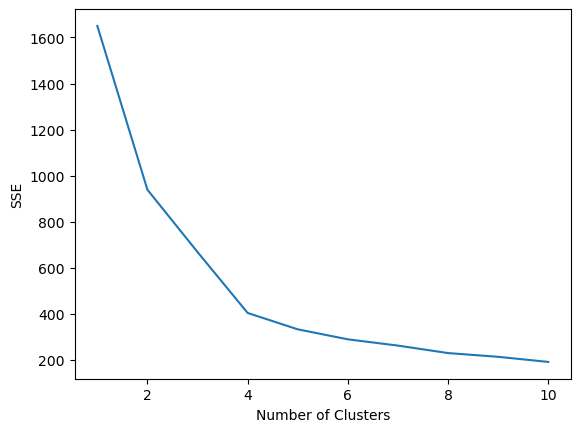

In [ ]:
# ELbow graph to determine ideal number of clusters

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'random')
    kmeans.fit(scaled_df1)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow is at 4; thus, the ideal number of clusters is 4.

In [ ]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(scaled_df1)
pred = kmeans.predict(scaled_df1)

print("Silhouette coefficient with 4 clusters: ", silhouette_score(scaled_df1, pred))

Silhouette coefficient with 4 clusters:  0.4429680369704011


Now, we repeat the experiment for KMeans++

In [ ]:
# Implementing KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(scaled_df1)

KMeans(n_clusters=3)

In [ ]:
pred = kmeans.predict(scaled_df1)
pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
kmeans.cluster_centers_

array([[ 1.59380554,  1.64465142,  1.64392142, -1.35245761, -2.15388082,
        -2.51478477,  0.656363  ,  1.47039073,  0.55670358,  1.84666864,
        -1.24758711, -2.18846883, -2.30811065,  0.66805268,  1.05172976,
        -0.75340333,  1.89450401, -1.40112848, -1.67307634, -2.14252153,
         0.1907252 ,  1.94642393,  1.19440515,  1.71434093, -2.25791938,
        -2.31631668, -1.92645634, -2.28705122, -2.16622258, -2.01964038,
        -2.66027165, -2.31362644, -2.75914436],
       [-0.86619866, -0.84807502, -0.84813586,  0.6461574 ,  0.37813871,
         0.75691328, -0.02632975,  0.20918822,  0.16836889, -0.89523499,
         0.53479577, -0.01934558,  0.3880302 , -0.54732026,  0.33150004,
         0.72869   , -0.88766702,  0.73268147,  0.53161345,  0.86381442,
         0.47385809, -0.04576108, -0.80529861, -0.89130921,  0.84671977,
         0.58995049,  0.89184282,  0.82315282,  0.60744095,  0.86228362,
         0.54056347,  0.394777  ,  0.69173766],
       [ 0.72760688,  0.6963

In [ ]:
kmeans.inertia_

665.7175940585548

In [ ]:
kmeans.n_iter_

2

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

C:\Users\M.Moaaz bin Sajjad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


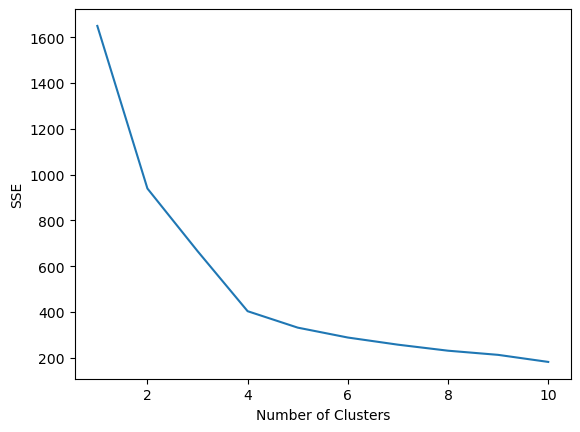

In [ ]:
# ELbow graph to determine ideal number of clusters

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(scaled_df1)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow is at 4; thus, the ideal number of clusters is 4.

In [ ]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_df1)
pred = kmeans.predict(scaled_df1)

print("Silhouette coefficient with 4 clusters: ", silhouette_score(scaled_df1, pred))

Silhouette coefficient with 4 clusters:  0.44894857706364955


## DataSet 2 – USA Unemployment

Link: https://www.kaggle.com/datasets/asaniczka/unemployment-rates-by-demographics-1978-2023

In [ ]:
# Reading the data into a dataframe

df2 = pd.read_csv("../Lab 5/unemployment.csv")
df2

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1979-04-01,5.9,11.9,4.2,2.8,3.7,9.9,5.4,4.9,3.0,...,9.4,2.8,2.3,3.5,7.5,3.8,3.6,2.0,1.3,164162000
532,1979-03-01,6.0,12.0,4.3,2.8,3.8,9.9,5.4,4.9,3.0,...,9.4,2.8,2.4,3.5,7.5,3.8,3.6,2.1,1.3,164027000
533,1979-02-01,6.0,12.2,4.3,2.8,3.8,9.9,5.4,5.0,3.0,...,9.6,2.8,2.4,3.5,7.6,3.9,3.6,2.1,1.4,163726000
534,1979-01-01,6.1,12.3,4.3,2.9,3.7,10.0,5.5,5.0,3.1,...,9.7,2.9,2.5,3.5,7.6,3.9,3.7,2.1,1.4,163516000


In [ ]:
# dropping non-numeric column

df2.drop(columns = ["date"], inplace = True)
df2

,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,advanced_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,1.7,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,5.9,11.9,4.2,2.8,3.7,9.9,5.4,4.9,3.0,2.0,...,9.4,2.8,2.3,3.5,7.5,3.8,3.6,2.0,1.3,164162000
532,6.0,12.0,4.3,2.8,3.8,9.9,5.4,4.9,3.0,2.0,...,9.4,2.8,2.4,3.5,7.5,3.8,3.6,2.1,1.3,164027000
533,6.0,12.2,4.3,2.8,3.8,9.9,5.4,5.0,3.0,2.0,...,9.6,2.8,2.4,3.5,7.6,3.9,3.6,2.1,1.4,163726000
534,6.1,12.3,4.3,2.9,3.7,10.0,5.5,5.0,3.1,2.0,...,9.7,2.9,2.5,3.5,7.6,3.9,3.7,2.1,1.4,163516000


In [ ]:
# Checking for NaN values

df2.isna().sum()

all                            0
16-24                          0
25-54                          0
55-64                          0
65+                            0
                              ..
white_men_high_school          0
white_men_some_college         0
white_men_bachelor's_degree    0
white_men_advanced_degree      0
population_over_16             0
Length: 121, dtype: int64

In [ ]:
# Standardising the data

scaler = StandardScaler()
scaled_df2 = pd.DataFrame(scaler.fit_transform(df2))
scaled_df2

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,-1.568761,-1.834371,-1.355222,-1.321072,-0.946709,-1.961543,-1.093517,-1.268873,-0.893735,-0.955549,...,-1.624363,-1.209971,-1.346463,-0.818694,-1.479612,-1.092865,-1.220254,-0.862085,-0.579140,1.684983
1,-1.568761,-1.834371,-1.355222,-1.321072,-0.858994,-1.924995,-1.093517,-1.268873,-0.893735,-0.955549,...,-1.624363,-1.209971,-1.346463,-0.727897,-1.479612,-1.092865,-1.151464,-0.862085,-0.579140,1.678453
2,-1.568761,-1.795824,-1.423301,-1.321072,-0.858994,-1.924995,-1.093517,-1.268873,-0.893735,-0.955549,...,-1.624363,-1.209971,-1.346463,-0.727897,-1.512980,-1.092865,-1.151464,-0.862085,-0.579140,1.672507
3,-1.568761,-1.795824,-1.423301,-1.321072,-0.858994,-1.924995,-1.093517,-1.268873,-0.893735,-0.955549,...,-1.624363,-1.209971,-1.260217,-0.727897,-1.512980,-1.092865,-1.151464,-0.862085,-0.579140,1.666821
4,-1.568761,-1.757276,-1.423301,-1.237055,-0.858994,-1.924995,-1.093517,-1.203815,-0.893735,-0.955549,...,-1.585777,-1.209971,-1.260217,-0.727897,-1.546349,-1.042218,-1.151464,-0.862085,-0.398769,1.661265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,-0.159471,-0.253937,-0.606357,-0.985004,-0.069551,-0.901640,-0.780556,-0.293004,-0.243746,-0.423880,...,-0.698295,-0.996376,-1.173971,0.180069,-1.312768,-1.092865,-0.669934,-0.980444,-1.120254,-1.656327
532,-0.098198,-0.215390,-0.538278,-0.985004,0.018165,-0.901640,-0.780556,-0.293004,-0.243746,-0.423880,...,-0.698295,-0.996376,-1.087726,0.180069,-1.312768,-1.092865,-0.669934,-0.862085,-1.120254,-1.660713
533,-0.098198,-0.138295,-0.538278,-0.985004,0.018165,-0.901640,-0.780556,-0.227946,-0.243746,-0.423880,...,-0.621122,-0.996376,-1.087726,0.180069,-1.279400,-1.042218,-0.669934,-0.862085,-0.939882,-1.670492
534,-0.036924,-0.099748,-0.538278,-0.900987,-0.069551,-0.865092,-0.728395,-0.227946,-0.135414,-0.423880,...,-0.582536,-0.925178,-1.001480,0.180069,-1.279400,-1.042218,-0.601143,-0.862085,-0.939882,-1.677315


In [ ]:
# Implementing KMeans

kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(scaled_df2)

KMeans(init='random', n_clusters=3)

In [ ]:
pred = kmeans.predict(scaled_df2)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
kmeans.cluster_centers_

array([[ 1.62217300e+00,  1.65097144e+00,  1.72627124e+00,
         1.79955633e+00,  1.66259653e+00,  1.58485419e+00,
         1.85554588e+00,  1.80028968e+00,  1.80026817e+00,
         1.69500541e+00,  1.48992128e+00,  1.51833851e+00,
         1.64733390e+00,  1.81012368e+00,  1.54032798e+00,
         1.59127708e+00,  1.82902448e+00,  1.73863621e+00,
         1.75279837e+00,  1.60616050e+00,  1.66712564e+00,
         1.70622549e+00,  1.72703137e+00,  1.74741587e+00,
         1.69753491e+00,  1.55660757e+00,  1.83271809e+00,
         1.79932553e+00,  1.73219287e+00,  1.52272567e+00,
         1.21830353e+00,  9.77189590e-01,  1.49506919e+00,
         1.74180217e+00,  1.60076489e+00,  1.56436443e+00,
         1.55966577e+00,  1.34958795e+00,  1.76357566e+00,
         1.69734135e+00,  9.80420652e-01,  7.52694587e-01,
         1.29573524e+00,  1.68020533e+00,  1.24643835e+00,
         1.39872384e+00,  1.30803773e+00,  1.19074499e+00,
         1.67324207e+00,  1.64411358e+00,  1.41322971e+0

In [ ]:
kmeans.inertia_

20628.80856929721

In [ ]:
kmeans.n_iter_

10

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

C:\Users\M.Moaaz bin Sajjad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


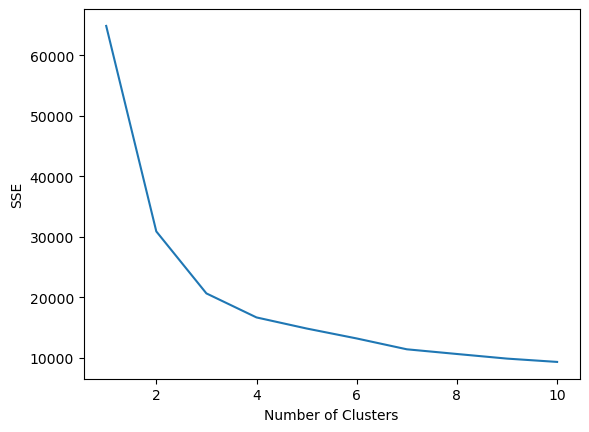

In [ ]:
# ELbow graph to determine ideal number of clusters

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'random')
    kmeans.fit(scaled_df2)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow is at 2; thus, the ideal number of clusters is 2.

In [ ]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 2, init = 'random')
kmeans.fit(scaled_df2)
pred = kmeans.predict(scaled_df2)

print("Silhouette coefficient with 2 clusters: ", silhouette_score(scaled_df2, pred))

Silhouette coefficient with 2 clusters:  0.4464208731582134


Now, we repeat the experiment for KMeans++

In [ ]:
# Implementing KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(scaled_df2)

KMeans(n_clusters=3)

In [ ]:
pred = kmeans.predict(scaled_df2)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
kmeans.cluster_centers_

array([[ 2.15629146e-01,  1.86841853e-01,  1.33924056e-01,
         1.62581727e-02, -2.02268743e-01,  1.77013555e-01,
        -4.50098395e-03,  8.43325837e-02, -1.81337614e-02,
         1.68655095e-02,  2.89094303e-01,  2.87804195e-01,
         2.05238790e-01,  1.04673735e-02, -2.01227927e-01,
         1.88305135e-01,  2.94217046e-02,  1.31697134e-01,
         5.73511307e-02,  1.97488913e-01,  1.59095939e-01,
         1.01996255e-01,  8.81129760e-02,  1.16025124e-02,
        -1.95477128e-01,  1.71085866e-01, -2.51100156e-02,
         5.16944235e-02, -5.87902419e-02, -4.77563142e-02,
         3.34117940e-01,  4.08423379e-01,  2.12697146e-01,
         1.32561881e-02, -1.77470417e-01, -3.19620937e-02,
         1.83300089e-01,  3.12485826e-01,  2.98912550e-02,
        -4.14821452e-02,  4.06798243e-01,  4.86057698e-01,
         2.90795528e-01, -2.02165048e-02, -3.36026405e-01,
         9.72460393e-02,  3.03092791e-01,  3.57401683e-01,
         1.36717189e-02, -8.50011738e-02,  2.48042819e-0

In [ ]:
kmeans.inertia_

20628.80856929721

In [ ]:
kmeans.n_iter_

6

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

C:\Users\M.Moaaz bin Sajjad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


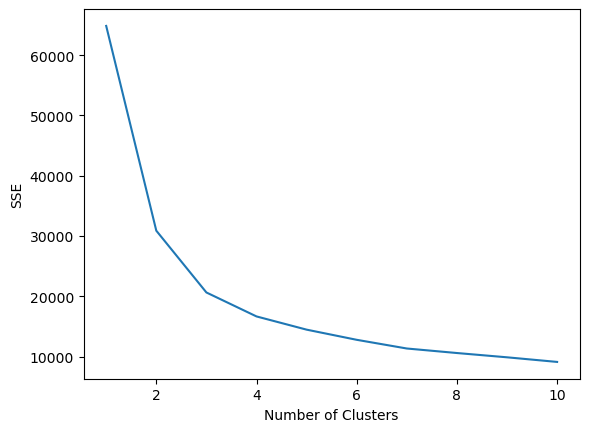

In [ ]:
# ELbow graph to determine ideal number of clusters

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(scaled_df2)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow is at 2; thus, the ideal number of clusters is 2.

In [ ]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 2, init = 'k-means++')
kmeans.fit(scaled_df2)
pred = kmeans.predict(scaled_df2)

print("Silhouette coefficient with 2 clusters: ", silhouette_score(scaled_df2, pred))

Silhouette coefficient with 2 clusters:  0.4464208731582134


**How will you incorporate the streaming data into your already existing clusters?**

To incorporate streaming data, we use _'minibatch K Means'_. The new data points are assigned to the apt cluster. Then the centroids and number of points are updated using exponential moving average as follows:

$$
c_{t + 1} = \frac{c_{t}n_{t}\alpha + x_{t}m_{t}}{n_{t} + m_{t}}
\\
n_{t + 1} = n_{t} + m_{t}
$$

where

$$
c_{t} = Current\space centroid
\\
c_{t + 1} = Updated\space centroid
\\
n_{t} = Number\space of\space data\space points\space belonging\space to\space cluster
\\
n_{t + 1} = Updated\space number\space of\space data\space points\space belonging\space to\space cluster
\\
x_{t} = Centroid\space of\space new\space data\space points
\\
m_{t} = Number\space of\space new\space data\space points
\\
\alpha = Constant\space between\space 0\space and\space 1.\space If\space this\space is\space 1,\space the\space past\space data\space is\space weighed\space as\space much\space as\space the\space new,\space arriving\space data.\space If\space it\space is\space 0,\space then\space the\space past\space data\space is\space not\space weighed\space at\space all!
$$